In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
train=pd.read_csv('./subsetTrain.csv')
test=pd.read_csv('./subsetTest.csv')
data=pd.concat([train,test],ignore_index="true")
data.head(5)

FileNotFoundError: File b'./subsetTrain.csv' does not exist

click                0       1
site_category                 
0569f928          9861     438
110ab22d             2       0
28905ebd       2654208  658527
335d28a8         55321    5605
3e814130        940921  344537
42a36e14           434     184
50e219e0       5715745  908245
5378d028           115       6
6432c423             2       0
70fb0e29          8667     950
72722551         16551    1208
74073276             8       1
75fa27f6         42257    7306
76b2941d         47461    2242
8fd0aea4           119       8
9ccfa2ea           121       2
a818d37a          1969       4
bcf865d9           565      34
c0dd3be3         10714    1656
c706e647             2       0
dedf689d          5207    1200
e787de0e           855      70
f028772b       4171315  906582
f66779e6        138777    6174


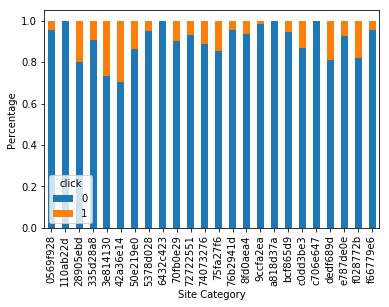

In [26]:
tab = pd.crosstab(data['site_category'], data['click'])
print(tab)
img=tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
img=plt.xlabel('Site Category')
img=plt.ylabel('Percentage')
plt.show()

click               0        1
app_category                  
07d7df22      8733623  2110222
09481d60        41321     8122
0bfbc358          318        6
0f2161f8      3425963   470256
0f9a328c         2364      437
18b1e0be          112        7
2281a340         1025       12
2fc4f2aa           34        0
4681bb9d         2852      418
4b7ade46            9        0
4ce2e9fc         8813     1071
52de74cf            1        0
5326cf99           26        0
6fea3693            1        0
7113d72a          117        3
71af18ce            2        0
75d80bbe        17340     1996
79f0b860          206        5
86c1a5a3            2        0
879c24eb         7181     1093
8ded1f7a       337934    42046
8df2e842          532      141
a3c42688         4780      224
a7fd01ec          151       32
a86a3e89         1114      150
bd41f328            4        0
bf8ac856            4        0
cba0e20d            1        0
cef3e649       839081   117258
d1327cf5        60192     8588
dc97ec06

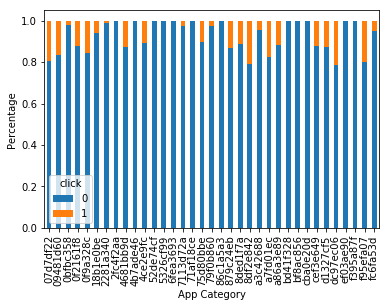

In [27]:
tab = pd.crosstab(data['app_category'], data['click'])
print(tab)
img=tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
img=plt.xlabel('App Category')
img=plt.ylabel('Percentage')
plt.show()

click              0        1
banner_pos                   
0           10261650  2043481
1            3543935   795862
2               4928      668
3                191        9
4               2343      507
5               4017      480
7               4133     3972


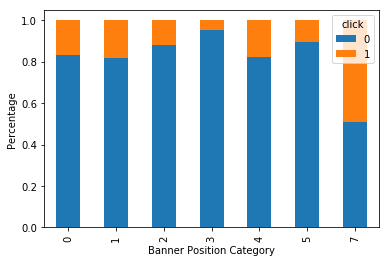

In [28]:
tab = pd.crosstab(data['banner_pos'], data['click'])
print(tab)
img=tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
img=plt.xlabel('Banner Position Category')
img=plt.ylabel('Percentage')
plt.show()

click                    0        1
device_conn_type                   
0                 12068658  2614458
2                  1187395   198282
3                   545144    31684
5                    20000      555


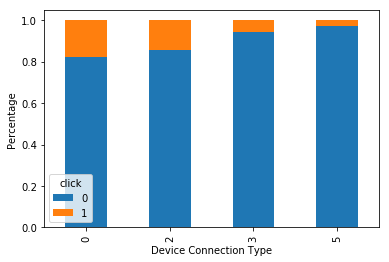

In [29]:
tab = pd.crosstab(data['device_conn_type'], data['click'])
print(tab)
img=tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
img=plt.xlabel('Device Connection Type')
img=plt.ylabel('Percentage')
plt.show()

In [30]:
impute_grps1=data.pivot_table(values=['click'],index=['device_conn_type'],aggfunc=np.mean)
impute_grps1

,click
device_conn_type,
0,0.178059
2,0.143094
3,0.054928
5,0.027001


In [31]:
data['user']=''

In [32]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'user'],
      dtype='object')

In [4]:
col_for_dummy=data.filter(['site_category'],axis=1)
col_for_dummy

,site_category
0,28905ebd
1,28905ebd
2,28905ebd
3,28905ebd
4,0569f928
5,f028772b
6,f028772b
7,f028772b
8,28905ebd
9,50e219e0


In [5]:
col_for_dummy.head(10)

,site_category
0,28905ebd
1,28905ebd
2,28905ebd
3,28905ebd
4,0569f928
5,f028772b
6,f028772b
7,f028772b
8,28905ebd
9,50e219e0


In [6]:

data_with_dummies=pd.get_dummies(col_for_dummy)

In [7]:
data_with_dummies

,site_category_0569f928,site_category_110ab22d,site_category_28905ebd,site_category_335d28a8,site_category_3e814130,site_category_42a36e14,site_category_50e219e0,site_category_5378d028,site_category_6432c423,site_category_70fb0e29,...,site_category_8fd0aea4,site_category_9ccfa2ea,site_category_a818d37a,site_category_bcf865d9,site_category_c0dd3be3,site_category_c706e647,site_category_dedf689d,site_category_e787de0e,site_category_f028772b,site_category_f66779e6
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.loc[data.device_id=='a99f214a','user']=data['device_ip']+data['device_model']

NameError: name 'data' is not defined

In [14]:
data.loc[data.device_id!='a99f214a','user']=data['device_id']

NameError: name 'data' is not defined

In [15]:
userList=data['user'].unique()
userList.size

NameError: name 'data' is not defined

In [16]:
len(userList)

NameError: name 'userList' is not defined

In [8]:
data['Site']=data['site_id']+data['site_domain']+data['site_category']

In [9]:
data['App']=data['app_id']+data['app_domain']+data['app_category']

In [10]:
data['Site_hash'] = data['Site'].apply(hash)

In [12]:
data['App_hash'] = data['App'].apply(hash)

In [13]:
data.head(100)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C16,C17,C18,C19,C20,C21,Site,App,Site_hash,App_hash
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,-1,79,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22,1443426778411358073,5956178263328457038
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,100084,79,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22,1443426778411358073,5956178263328457038
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,100084,79,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22,1443426778411358073,5956178263328457038
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,100084,79,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22,1443426778411358073,5956178263328457038
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,50,2161,0,35,-1,157,fe8cc4489166c1610569f928,ecad23867801e8d907d7df22,-7745942467458803957,5956178263328457038
5,1.000072e+19,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,50,1899,0,431,100077,117,d6137915bb1ef334f028772b,ecad23867801e8d907d7df22,3035800241667464296,5956178263328457038
6,1.000072e+19,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,50,2333,0,39,-1,157,8fda644b25d4cfcdf028772b,ecad23867801e8d907d7df22,-6259996984539826195,5956178263328457038
7,1.000092e+19,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,50,2374,3,39,-1,23,e151e2457e091613f028772b,ecad23867801e8d907d7df22,3366836657128416235,5956178263328457038
8,1.000095e+19,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,-1,79,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22,1443426778411358073,5956178263328457038
9,1.000126e+19,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,50,2496,3,167,100191,23,84c7ba46c4e18dd650e219e0,ecad23867801e8d907d7df22,-2495212581889948023,5956178263328457038


In [14]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'Site', 'App',
       'Site_hash', 'App_hash'],
      dtype='object')

In [15]:
features=['hour','C1','banner_pos','device_type','device_conn_type','Site_hash','App_hash']

In [68]:
y=data['click']

y.shape

(16666176,)

In [18]:
x=data[features]

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=324)

In [20]:
train.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
13330869,9.999684e+18,0,14102323,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
13330870,9.999712e+18,0,14102323,1005,0,d7f3460b,f7570339,f028772b,ecad2386,7801e8d9,...,1,0,17212,320,50,1887,3,39,-1,23
13330871,9.999797e+18,1,14102323,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
13330872,9.999879e+18,0,14102323,1005,0,85f751fd,c4e18dd6,50e219e0,e2a1ca37,2347f47a,...,1,0,17017,320,50,1873,3,39,-1,23
13330873,1.000003e+19,1,14102400,1005,0,801dfefb,9b421927,75fa27f6,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79


In [21]:
test.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
3335297,9.999364e+18,0,14102423,1010,1,85f751fd,c4e18dd6,50e219e0,b8875973,7801e8d9,...,5,2,20279,728,90,2325,3,801,-1,42
3335298,9.999480e+18,0,14102423,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,...,1,0,16859,320,50,1887,3,39,-1,23
3335299,9.999540e+18,1,14102423,1002,0,61a8c644,948ff336,50e219e0,ecad2386,7801e8d9,...,0,0,21789,320,50,2512,2,291,-1,52
3335300,9.999879e+18,1,14102423,1002,0,e1419bff,929ef00a,50e219e0,ecad2386,7801e8d9,...,0,0,4687,320,50,423,2,39,100148,32
3335301,1.000020e+19,0,14102500,1010,1,85f751fd,c4e18dd6,50e219e0,8ba06868,7801e8d9,...,4,0,17875,320,50,2036,3,47,-1,156


In [28]:
testdata=data[13330874:].copy()
traindata=data[:13330873].copy()

In [44]:
testdata.shape

(3335302, 28)

In [45]:
traindata.shape

(13330873, 28)

In [62]:
data.columns


Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'Site', 'App',
       'Site_hash', 'App_hash'],
      dtype='object')

In [47]:
ytest=testdata['click'].copy()
ytrain=traindata['click'].copy()
xtrain=traindata[features].copy()
xtest=testdata[features].copy()

In [48]:
ytest.shape


(3335302,)

In [49]:
xtest.shape

(3335302, 7)

In [50]:
ytrain.shape

(13330873,)

In [51]:
xtrain.shape

(13330873, 7)

In [34]:
ytrain.shpae

AttributeError: 'Series' object has no attribute 'shpae'

In [54]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)
pred=logistic.predict(xtest)
accuracy_score(y_true=ytest,y_pred=pred)

0.77849142296559648

In [58]:
from sklearn.metrics import log_loss
log_loss(ytest, pred)/20

0.38253396751612428

In [65]:
newdf=data['hour']

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification

'''
A sci-kit learn inspired script to convert pandas dataframes into libFFM style data.

The script is fairly hacky (hey thats Kaggle) and takes a little while to run a huge dataset.
The key to using this class is setting up the features dtypes correctly for output (ammend transform to suit your needs)

Example below

'''


class FFMFormatPandas:
    def __init__(self):
        self.field_index_ = None
        self.feature_index_ = None
        self.y = None

    def fit(self, df, y=None):
        self.y = y
        df_ffm = df[df.columns.difference([self.y])]
        if self.field_index_ is None:
            self.field_index_ = {col: i for i, col in enumerate(df_ffm)}

        if self.feature_index_ is not None:
            last_idx = max(list(self.feature_index_.values()))

        if self.feature_index_ is None:
            self.feature_index_ = dict()
            last_idx = 0

        for col in df.columns:
            vals = df[col].unique()
            for val in vals:
                if pd.isnull(val):
                    continue
                name = '{}_{}'.format(col, val)
                if name not in self.feature_index_:
                    self.feature_index_[name] = last_idx
                    last_idx += 1
            self.feature_index_[col] = last_idx
            last_idx += 1
        return self

    def fit_transform(self, df, y=None):
        self.fit(df, y)
        return self.transform(df)

    def transform_row_(self, row, t):
        ffm = []
        if self.y != None:
            ffm.append(str(row.loc[row.index == self.y][0]))
        if self.y is None:
            ffm.append(str(0))

        for col, val in row.loc[row.index != self.y].to_dict().items():
            col_type = t[col]
            name = '{}_{}'.format(col, val)
            if col_type.kind ==  'O':
                ffm.append('{}:{}:1'.format(self.field_index_[col], self.feature_index_[name]))
            elif col_type.kind == 'i':
                ffm.append('{}:{}:{}'.format(self.field_index_[col], self.feature_index_[col], val))
        return ' '.join(ffm)

    def transform(self, df):
        t = df.dtypes.to_dict()
        return pd.Series({idx: self.transform_row_(row, t) for idx, row in df.iterrows()})

########################### Lets build some data and test ############################
### 


#train, y = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=2, n_classes=2, random_state=42)

#train=pd.DataFrame(train, columns=['int1','int2','int3','s1','s2'])
#train['int1'] = train['int1'].map(int)
#train['int2'] = train['int2'].map(int)
#train['int3'] = train['int3'].map(int)
#train['s1'] = round(np.log(abs(train['s1'] +1 ))).map(str)
#train['s2'] = round(np.log(abs(train['s2'] +1 ))).map(str)
#train['clicked'] = y


ffm_train = FFMFormatPandas()
ffm_train_data = ffm_train.fit_transform(data)
print('Base data')
#print(train[0:10])
print('FFM data')
print(ffm_train_data[0:100])

KeyboardInterrupt: 

In [69]:
ffm_train = FFMFormatPandas()
ffm_train_data = ffm_train.fit_transform(data, y)
print('Base data')
#print(train[0:10])
print('FFM data')
print(ffm_train_data[0:100])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [70]:
# -*- coding: utf-8 -*-

class FFMFormat:
    def __init__(self):
        self.field_index_ = None
        self.feature_index_ = None

    def get_params(self):
        pass
    
    def set_params(self, **parameters):
        pass

    def fit(self, df, y=None):
        self.field_index_ = {col: i for i,col in enumerate(df.columns)}
        self.feature_index_ = dict()
        last_idx = 0
        for col in df.columns:
            vals = np.unique(df[col])
            for val in vals:
                if np.isnan(val): continue
                name = '{}_{}'.format(col, val)
                if name not in self.feature_index_:
                    self.feature_index_[name] = last_idx
                    last_idx += 1
            self.feature_index_[col] = last_idx
            last_idx += 1
        return self

    def fit_transform(self, df, y=None):
        self.fit(df, y)
        return self.transform(df)

    def transform_row_(self, row):
        ffm = []
        for col,val in row.loc[row!=0].to_dict().iteritems():
            name = '{}_{}'.format(col, val)
            ffm.append('{}:{}:1'.format(self.field_index_[col], self.feature_index_[name]))
            ffm.append('{}:{}:{}'.format(self.field_index_[col], self.feature_index_[col], val))
        return ' '.join(ffm)

    def transform(self, df):
        return pd.Series({idx: self.transform_row_(row) for idx,row in df.iterrows()})

In [89]:
dfnew.head()

,click,C1,hour,C14
0,0,1005,14102100,15706
1,0,1005,14102100,15704
2,0,1005,14102100,15704
3,0,1005,14102100,15706
4,0,1005,14102100,18993


In [ ]:
ffm_train = FFMFormat()
ffm_train_data = ffm_train.fit_transform(dfnew, y='click')
print('Base data')
#print(train[0:10])
print('FFM data')
print(ffm_train_data[0:100])

In [101]:
data.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
Site                 object
App                  object
Site_hash             int64
App_hash              int64
dtype: object

In [100]:
type(data)

pandas.core.frame.DataFrame

In [110]:
dfnew=data.filter(['click','C1','hour','C14'],axis=1)

In [111]:
dfnew.dtypes

click    int64
C1       int64
hour     int64
C14      int64
dtype: object

In [105]:
dfnew['click'] = dfnew['click'].map(int)
dfnew['C1'] = dfnew['C1'].map(int)
dfnew['hour'] = dfnew['hour'].map(int)
dfnew['C14'] = dfnew['C14'].map(int)

In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification

'''
A sci-kit learn inspired script to convert pandas dataframes into libFFM style data.

The script is fairly hacky (hey thats Kaggle) and takes a little while to run a huge dataset.
The key to using this class is setting up the features dtypes correctly for output (ammend transform to suit your needs)

Example below

'''


class FFMFormatPandas:
    def __init__(self):
        self.field_index_ = None
        self.feature_index_ = None
        self.y = None

    def fit(self, df, y=None):
        self.y = y
        df_ffm = df[df.columns.difference([self.y])]
        if self.field_index_ is None:
            self.field_index_ = {col: i for i, col in enumerate(df_ffm)}

        if self.feature_index_ is not None:
            last_idx = max(list(self.feature_index_.values()))

        if self.feature_index_ is None:
            self.feature_index_ = dict()
            last_idx = 0

        for col in df.columns:
            vals = df[col].unique()
            for val in vals:
                if pd.isnull(val):
                    continue
                name = '{}_{}'.format(col, val)
                if name not in self.feature_index_:
                    self.feature_index_[name] = last_idx
                    last_idx += 1
            self.feature_index_[col] = last_idx
            last_idx += 1
        return self

    def fit_transform(self, df, y=None):
        self.fit(df, y)
        return self.transform(df)

    def transform_row_(self, row, t):
        ffm = []
        if self.y != None:
            ffm.append(str(row.loc[row.index == self.y][0]))
        if self.y is None:
            ffm.append(str(0))

        for col, val in row.loc[row.index != self.y].to_dict().items():
            col_type = t[col]
            name = '{}_{}'.format(col, val)
            if col_type.kind ==  'O':
                ffm.append('{}:{}:1'.format(self.field_index_[col], self.feature_index_[name]))
            elif col_type.kind == 'i':
                ffm.append('{}:{}:{}'.format(self.field_index_[col], self.feature_index_[col], val))
        return ' '.join(ffm)

    def transform(self, df):
        t = df.dtypes.to_dict()
        return pd.Series({idx: self.transform_row_(row, t) for idx, row in df.iterrows()})

########################### Lets build some dat

In [113]:
ffm_train = FFMFormatPandas()
ffm_train_data = ffm_train.fit_transform(dfnew, y="click")
print('Base data')
#print(train[0:10]) 
print('FFM data')
print(ffm_train_data[0:100])

KeyboardInterrupt: 

In [ ]:
data.head()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification

'''
A sci-kit learn inspired script to convert pandas dataframes into libFFM style data.

The script is fairly hacky (hey thats Kaggle) and takes a little while to run a huge dataset.
The key to using this class is setting up the features dtypes correctly for output (ammend transform to suit your needs)

Example below

'''


class FFMFormatPandas:
    def __init__(self):
        self.field_index_ = None
        self.feature_index_ = None
        self.y = None

    def fit(self, df, y=None):
        self.y = y
        df_ffm = df[df.columns.difference([self.y])]
        if self.field_index_ is None:
            self.field_index_ = {col: i for i, col in enumerate(df_ffm)}

        if self.feature_index_ is not None:
            last_idx = max(list(self.feature_index_.values()))

        if self.feature_index_ is None:
            self.feature_index_ = dict()
            last_idx = 0

        for col in df.columns:
            vals = df[col].unique()
            for val in vals:
                if pd.isnull(val):
                    continue
                name = '{}_{}'.format(col, val)
                if name not in self.feature_index_:
                    self.feature_index_[name] = last_idx
                    last_idx += 1
            self.feature_index_[col] = last_idx
            last_idx += 1
        return self

    def fit_transform(self, df, y=None):
        self.fit(df, y)
        return self.transform(df)

    def transform_row_(self, row, t):
        ffm = []
        if self.y != None:
            ffm.append(str(row.loc[row.index == self.y][0]))
        if self.y is None:
            ffm.append(str(0))

        for col, val in row.loc[row.index != self.y].to_dict().items():
            col_type = t[col]
            name = '{}_{}'.format(col, val)
            if col_type.kind ==  'O':
                ffm.append('{}:{}:1'.format(self.field_index_[col], self.feature_index_[name]))
            elif col_type.kind == 'i':
                ffm.append('{}:{}:{}'.format(self.field_index_[col], self.feature_index_[col], val))
        return ' '.join(ffm)

    def transform(self, df):
        t = df.dtypes.to_dict()
        return pd.Series({idx: self.transform_row_(row, t) for idx, row in df.iterrows()})

########################### Lets build some data and test ############################
### 


train, y = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=2, n_classes=2, random_state=42)

train=pd.DataFrame(train, columns=['int1','int2','int3','s1','s2'])
train['int1'] = train['int1'].map(int)
train['int2'] = train['int2'].map(int)
train['int3'] = train['int3'].map(int)
train['s1'] = round(np.log(abs(train['s1'] +1 ))).map(str)
train['s2'] = round(np.log(abs(train['s2'] +1 ))).map(str)
train['clicked'] = y


ffm_train = FFMFormatPandas()
ffm_train_data = ffm_train.fit_transform(train, y='clicked')
print('Base data')
print(train[0:10])
print('FFM data')
print(ffm_train_data[0:10])